DATA ANALYSIS 
--

Analysis for Zuber, a new ride-sharing company launching in Chicago. Find patterns in available information to understand passenger preferences and the impact of external factors on travel.

In [17]:
#Declare libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import plotly.express as px

In [18]:
#Open databases
companies_trips = pd.read_csv('dataset/moved_project_sql_result_01.csv')
neighborhood_avgtrips = pd.read_csv('dataset/moved_project_sql_result_04.csv')

In [19]:
#Check information from the first database 
print(companies_trips.head(),'\n')
companies_trips.info()

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [20]:
#Check information from the second database 
print(neighborhood_avgtrips.head(10),'\n')
neighborhood_avgtrips.info()

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


<Axes: xlabel='Neighborhoods', ylabel='Duration trips in seconds'>

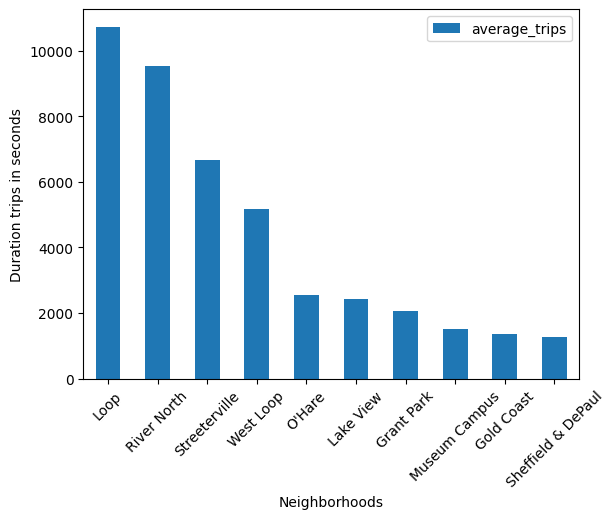

In [21]:
#Graph of the top 10 neighborhoods with the best average trip duration.
neighborhood_avgtrips.head(10).plot(kind='bar',x='dropoff_location_name',y='average_trips',rot=45,xlabel= 'Neighborhoods',ylabel='Duration trips in seconds')

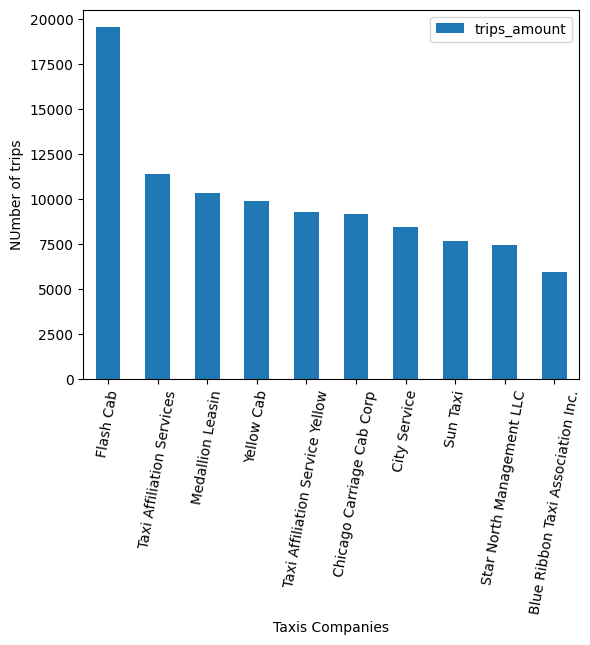

In [22]:
#Graph of the top 10 taxis companies with the best trip duration.
companies_trips.head(10).plot(kind='bar',x='company_name',y='trips_amount',rot=80,xlabel= 'Taxis Companies',ylabel='NUmber of trips')
plt.show()

Conclusions
--
We can see that the neighborhoods where people tend to drop off more are:
- Loop   
- River North    
- Streeterville   
- West Loop

with the top 5 taxies companies in amount of trips:
- Flash Cab
- Taxi Affiliation Services
- Medallion Leasin
- Yellow Cab  
- 9299



Hypothesis testing
--
Let's first review the data frame to confirm that all the data is of the correct type and understand the information to be analyzed.

In [23]:
trip_description = pd.read_csv('dataset/moved_project_sql_result_07.csv')
trip_description.info()
print('\n',trip_description.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

               start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [24]:
trip_description['start_ts'] = pd.to_datetime(trip_description['start_ts'] ,format= "%Y-%m-%d %H:%M:%S")
trip_description.info()
print('\n',trip_description.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB

              start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0


Stating these hypotheses, we are going to analyze whether the average travel time from a neighborhood to an airport is the same on Saturdays when the weather is good as when the weather is bad.

H0 : Average trip times from the Loop to O'Hare International Airport are the same on rainy Saturdays and no rainy Saturdays.


H1 : The average trip times from the Loop to O'Hare International Airport changes on rainy Saturdays and no rainy Saturdays.

We can see how many trips the people do in rainy and not rainy days: 
 weather_conditions
Bad     180
Good    888
Name: duration_seconds, dtype: int64

We can see the total of how many trips the people do in rainy and not rainy days: 
 weather_conditions
Bad      436897.0
Good    1775712.0
Name: duration_seconds, dtype: float64

We can see the avegare of how many trips the people do in rainy and not rainy days: 
 weather_conditions
Bad     2427.205556
Good    1999.675676
Name: duration_seconds, dtype: float64


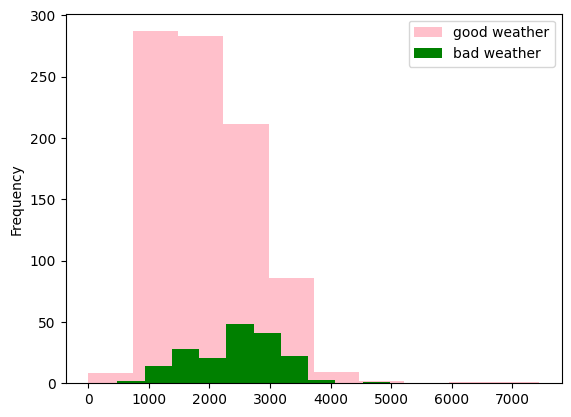

In [25]:
trips_count = trip_description.groupby('weather_conditions')['duration_seconds'].count()
trips_sum = trip_description.groupby('weather_conditions')['duration_seconds'].sum()
trips_mean = trip_description.groupby('weather_conditions')['duration_seconds'].mean()

print('We can see how many trips the people do in rainy and not rainy days: \n', trips_count)
print('\nWe can see the total of how many trips the people do in rainy and not rainy days: \n', trips_sum)
print('\nWe can see the avegare of how many trips the people do in rainy and not rainy days: \n', trips_mean)

bad_weather = trip_description[trip_description['weather_conditions'] == 'Bad']['duration_seconds']
good_weather = trip_description[trip_description['weather_conditions'] == 'Good']['duration_seconds']

good_weather.plot(kind='hist',color='pink')
bad_weather.plot(kind='hist',color='green')

plt.legend(['good weather','bad weather'])
plt.show()

In [26]:
alpha = 0.05

var_l = st.levene(bad_weather, good_weather)
print('The variance ->',var_l.pvalue)

if var_l.pvalue < alpha:
    print("We reject the null hypothesis, the variances are not equal\n")
else:
    print("We cannot reject the null hypothesis, the variances are equal.\n")


test = st.ttest_ind(bad_weather, good_weather,equal_var=True) 
print('P value:', test.pvalue,'\n')

if test.pvalue < alpha:
    print("We reject the null hypothesis,\n The average duration of the trips from Loop to the O'Hare International Airport is NOT equal on rainy days.")
else:
    print("We cannot reject the null hypothesis,\nThe average duration of the trips from Loop to the O'Hare International Airport is equal on rainy days.")

The variance -> 0.5332038671974493
We cannot reject the null hypothesis, the variances are equal.

P value: 6.517970327099473e-12 

We reject the null hypothesis,
 The average duration of the trips from Loop to the O'Hare International Airport is NOT equal on rainy days.


CONCLUSIONS.

The average duration of the trips from Loop neighborhood to the O'Hare International Airport is NOT equal on rainy days than on no rainy days. 
We can see in the graph that the total duration of the trips on saturdays when the weather is good is higher, but in average bewteen the total of seconds and the total of trips is higher in rainy conditions. 
The variances seem to be equal insead the excepted vaule of 0.5. However, the avegare on rainy days and no rainy are not the same. 